# The Hilbert Transform and Analytic Representation of Signals

## Hilbert Transform

The Hilbert transform of a function $u(t)$ is the covolution of the function with $\frac{1}{{\pi}t}$ (the Cauchy Kernel), or $u(t)*\frac{1}{{\pi}t}$:

Alternatively, an easier concept to grasp is that we are simply applying a $90^{\circ}$ phase shift to **all sinusoids in the Fourier series** that comprises the signal.

1. Take the FFT of a signal
2. Rotate phase of Fourier coefficients by $90^\circ$, or $\frac{\pi}{2} rad$
    + Positive frequencies are shifted by $\frac{\pi}{2}$ (rotate in counterclockwise direction)
    + Negative frequencies are shifted by $-\frac{\pi}{2}$ (rotate in clockwise direction)


>*NOTE: a $90^\circ$ phase shift of a sinusoid is easily accomplished by multiplying the Fourier coefficient by $j$.  To see this, apply a $\frac{\pi}{2}$ phase shift to a complex exponential sinusoid:*
>
>$$
e^{j(\omega{t} + \frac{\pi}{2})} = e^{j\omega{t}}{\cdot}e^{j\frac{\pi}{2}}
$$
>
>...and since $e^{j\frac{\pi}{2}} = j$, the phase-shifted sinusoid will be: $je^{j\omega{t}}$ (or $-je^{-j\omega{t}}$ for negative $\omega$).  Voila!


3. Take iFFT of the rotated Fourier coefficients

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

In [2]:
def hilbert_t(signal):
    # take FFT to compute complex fourier coefficients:
    fft = np.fft.fft(signal)
    
    # rotate coefficients by +/-90 degrees:
    if len(fft)%2 == 0:
        neg = -1j*fft[:int(len(fft)/2)] # coefficients of negative harmonics
        pos = 1j*fft[int(len(fft)/2):] # coefficients of positive harmonics
        shifted_fft = np.concatenate((neg, pos))
    else:
        neg = -1j*fft[:int(np.floor(len(fft)/2))]        
        pos = 1j*fft[int(np.floor(len(fft)/2))+1:]        
        shifted_fft = np.concatenate((neg, np.array([fft[int(np.floor(len(fft)/2))]]), pos))
    assert len(shifted_fft) == len(fft), str(len(shifted_fft)) + " does not equal " + str(len(fft))
    # apply iFFT:
    ifft = np.fft.ifft(shifted_fft)
    
    # add to original (real) signal values:
    return np.real(signal) + 1j*np.real(ifft)

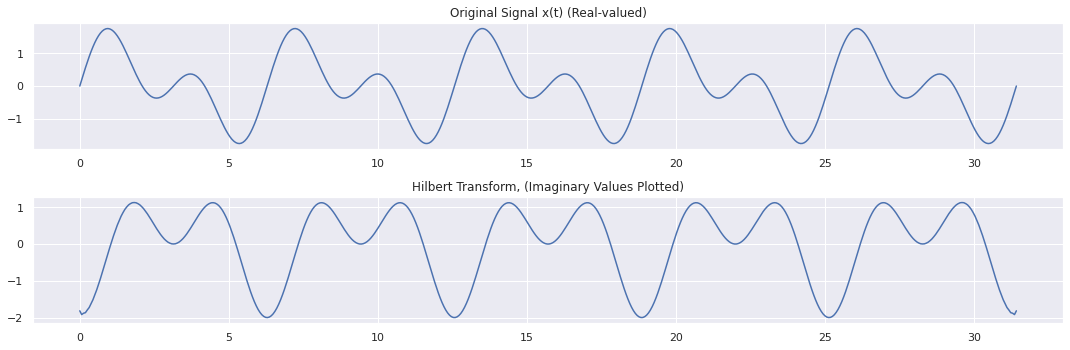

In [3]:
num_samples = 500
t = np.linspace(0,5*2*np.pi,num_samples)
test_signal = np.sin(t) + np.sin(2*t)
#test_signal = np.random.random(num_samples)

test_signal_ht = hilbert_t(test_signal)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,5))
axs[0].plot(t, np.real(test_signal))
axs[0].set_title("Original Signal x(t) (Real-valued)")
axs[1].plot(t, np.imag(test_signal_ht))
axs[1].set_title("Hilbert Transform, (Imaginary Values Plotted)")
fig.tight_layout(pad=1)

## Analytic Representation of a Signal

The **Analytic Representation** of a real-valued signal is the original signal added to its Hilbert transform.  This results in a complex-valued signal where:
1. The real values are the same as the real values of the original signal
2. The imaginary values are the values provided by the Hilbert transform (i.e., its fourier series's sinusoids shifted 90 deg)

The AR is used because it discards the "negative" frequency components, representing them instead as the complex part of the fourier coefficients.  This is possible because the Hilbert transform is **conjugate symmetric**, (i.e. has the property of **Hermitian symmetry**).
+ A signal $x(t)$ is **conjugate symmetric** if $x(t) = x^\ast(-t)$, that is, if its real part is **even** and it's imaginary part is **odd** about the origin
    + see https://www.youtube.com/watch?v=O1HRtZmkI4E
+ Practically, this is accomplished by adding the "negative" frequency components to the "positive", resulting in a complex fourier coefficient:

$$
e^{j(\omega{t}+({-\omega})t)} = e^{j\omega{t}-j\omega{t}} = e^{j\omega{t}}e^{-j\omega{t}} \rightarrow
$$
$$
(real - j\cdot{imaginary})e^{j\omega{t}}
$$
and since $-j = e^{-j\frac{\pi}{2}}$:
$$
real{\cdot}e^{j\omega{t}} + e^{-j\frac{\pi}{2}}imaginary{\cdot}e^{j\omega{t}}
$$
$$real{\cdot}e^{j\omega{t}} + imaginary{\cdot}e^{-j\frac{\pi}{2} + j\omega{t}}
$$
$$
real{\cdot}e^{j\omega{t}} + imaginary{\cdot}e^{j(\omega{t} - \frac{\pi}{2})}
$$

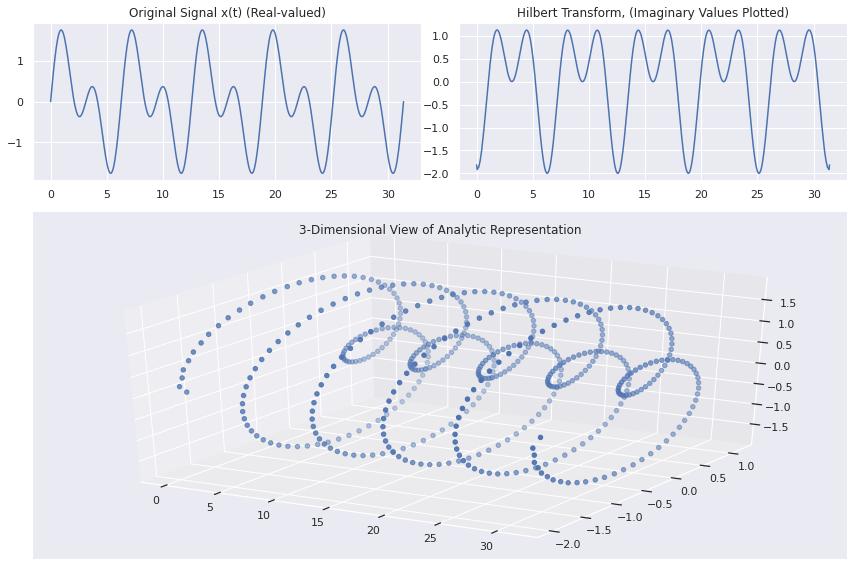

In [4]:
gridsize = (3, 2) # overall grid layout for the figure

fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0,0)) # top left in the 3x2 grid
ax2 = plt.subplot2grid(gridsize, (0,1)) # top right in the 3x2 grid
ax3 = plt.subplot2grid(gridsize, (1, 0), colspan=2, rowspan=2, projection='3d') # this one takes up 2 rows and 2 columns

# manipulate the little graphs:
ax1.plot(t, np.real(test_signal))
ax1.set_title("Original Signal x(t) (Real-valued)")
ax2.plot(t, np.imag(test_signal_ht))
ax2.set_title("Hilbert Transform, (Imaginary Values Plotted)")

# manipulate the big graph:
#ax3.plot(projection='3d')
ax3.set_title('3-Dimensional View of Analytic Representation')
#ax3.plot(xs=t, ys=np.imag(test_signal_ht), zs=test_signal, zdir='z', label='Analytic Representation')
ax3.scatter(xs=t, ys=np.imag(test_signal_ht), zs=test_signal, zdir='z', label='Analytic Representation')

fig.tight_layout(pad=1) # do this to prevent xlabels on upper plots overlapping title on lower plot

In [5]:
# The scipy hilbert transform function produces the analytic representation of the input:
# 1. real values are the original, real-valued input signal
# 2. imaginary values are the hilbert-transformed signal (phase-shifted 90 degrees)

test_signal_scipy_ht = signal.hilbert(np.real(test_signal))

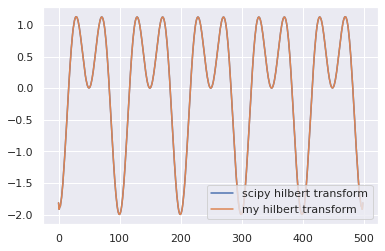

In [8]:
fig, ax = plt.subplots()

ax.plot(np.imag(test_signal_scipy_ht), label="scipy hilbert transform")
ax.plot(np.imag(test_signal_ht), label="my hilbert transform")
ax.legend(loc="lower right")

In [9]:
%timeit temp = hilbert_t(test_signal)

31 µs ± 155 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
%timeit temp = signal.hilbert(test_signal)

30 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Normalized Analytic Respresentation

Scale the AR to "normalize", so that the sum of all the squared magnitudes is 1

### Probability Amplitude Function and Probability Density Function

Notes from:
+ Funkhouser Scott, Suski William and Winn Andrew, "Waveform information from quantum mechanical entropy", *Proceedings of the Royal Society,* Vol 472, Issue 2190, June 2016.

In [11]:
num_samples = 200
t = np.linspace(-np.pi,np.pi,num_samples)

# from Funkhouser, Winn, Suski paper:
d = 1
theta = 10
c = (np.power((8/np.pi),0.25)*(1/np.sqrt(d)))
test_signal =  c*np.exp(-np.power(t,2)/np.power(d,2))*np.cos(theta*t)

test_signal_ht = signal.hilbert(test_signal)

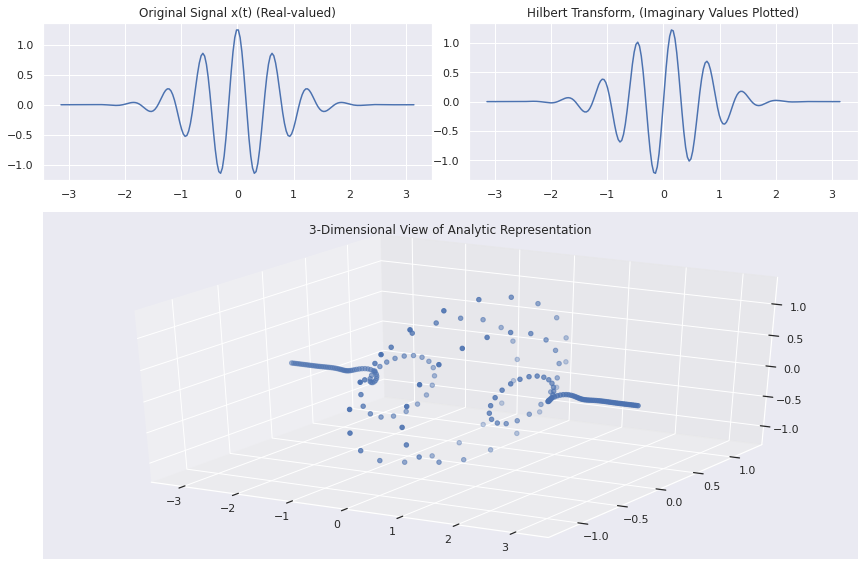

In [12]:
gridsize = (3, 2) # overall grid layout for the figure

fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0,0)) # top left in the 3x2 grid
ax2 = plt.subplot2grid(gridsize, (0,1)) # top right in the 3x2 grid
ax3 = plt.subplot2grid(gridsize, (1, 0), colspan=2, rowspan=2, projection='3d') # this one takes up 2 rows and 2 columns

# manipulate the little graphs:
ax1.plot(t, np.real(test_signal))
ax1.set_title("Original Signal x(t) (Real-valued)")
ax2.plot(t, np.imag(test_signal_ht))
ax2.set_title("Hilbert Transform, (Imaginary Values Plotted)")

# manipulate the big graph:
#ax3.plot(projection='3d')
ax3.set_title('3-Dimensional View of Analytic Representation')
#ax3.plot(xs=t, ys=np.imag(test_signal_ht), zs=test_signal, zdir='z', label='Analytic Representation')
ax3.scatter(xs=t, ys=np.imag(test_signal_ht), zs=test_signal, zdir='z', label='Analytic Representation')

fig.tight_layout(pad=1) # do this to prevent xlabels on upper plots overlapping title on lower plot

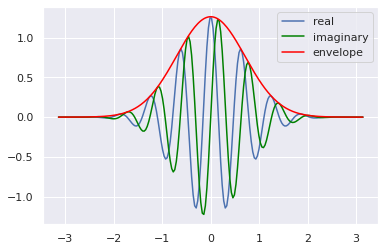

In [13]:
fig, ax = plt.subplots()
ax.plot(t, np.real(test_signal_ht), label='real')
ax.plot(t, np.imag(test_signal_ht), label='imaginary', color='green')
ax.plot(t, np.abs(test_signal_ht), label='envelope', color='red')
ax.legend(loc='upper right')

In [14]:
norm = np.sum(np.abs(test_signal_ht))
normalized_test_signal_ht = test_signal_ht/norm

np.sum(np.abs(normalized_test_signal_ht))

0.9999999999999999

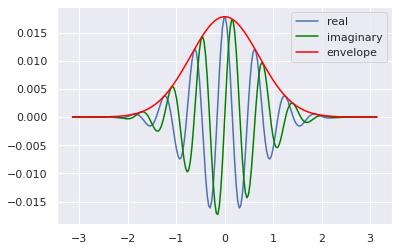

In [15]:
fig, ax = plt.subplots()
ax.plot(t, np.real(normalized_test_signal_ht), label='real')
ax.plot(t, np.imag(normalized_test_signal_ht), label='imaginary', color='green')
ax.plot(t, np.abs(normalized_test_signal_ht), label='envelope', color='red')
ax.legend(loc='upper right')

Text(0.5, 1.0, 'Frequency Domain Squared Amplitude')

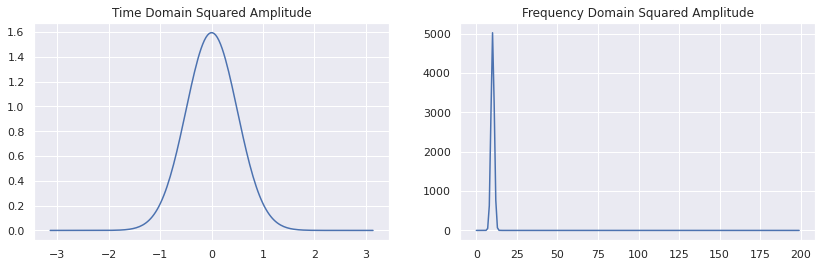

In [16]:
time_domain_squared_amp = np.square(np.abs(test_signal_ht))
freq_domain_squared_amp = np.square(np.abs(np.fft.fft(test_signal_ht)))

fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
ax[0].plot(t, time_domain_squared_amp)
ax[0].set_title('Time Domain Squared Amplitude')

ax[1].plot(freq_domain_squared_amp)
ax[1].set_title('Frequency Domain Squared Amplitude')